# About this notebook
This notebook generates figure 2 of the paper. 

About the data used: 
- Alignments are not included in the repository. The code expects the sequence header in the alignment to be of the for `name|-|-|date|region|country|...` where `-` and `...` are not used.
- HA amino acid sequences should include the signaling peptide (SigPep) and the HA1 and HA2 proteins. Sequence length should be 566, which includes the start codon. This is important when using files containing lists of epitope positions or binary positions.
- For the same reason, nucleotide sequences of HA should be of length 1701, and those of NA of length 1436. 
- Trees used in the paper are included. If your alignment contains strains that are not present in these trees, you should re-infer them using `augur tree` and `augur refine`. 
- The `aamuts_json` variable points to a file that stores amino acid mutations on each branch of the tree. This file is the output of the `augur ancestral` command.   

About variables that the code uses:
- `fp_X` represents the entire population of strains for gene `X`, together with a time binning. 
- `ph_X` is an array, with `ph_X[i]` containing the frequencies of all amino acids or nucleotides appearing at position `i` through time. 
- `trajectories` contains all the frequency trajectories for gene HA and for amino acids.  
The source code for those objects is in `src/FluPredictibility.jl`.

In [1]:
using FluPredictibility, FluPredictibility.BioTools, FluPredictibility.TreeTools
using Plots
using BioSequences
using StatsBase, Dates, Measures, DataStructures, Random, 
    Statistics, DelimitedFiles, LaTeXStrings, DataFrames
Flu = FluPredictibility
pyplot()

Plots.PyPlotBackend()

In [2]:
## Input data
# Alignmemnts
aln_h3n2_ha_aa = "../alignments/aligned_h3n2_ha_aa.fasta"
aln_h3n2_ha_nt = "../alignments/aligned_h3n2_ha.fasta"
aln_h3n2_na_aa = "../alignments/aligned_h3n2_na_aa.fasta"
aln_h3n2_na_nt = "../alignments/aligned_h3n2_na.fasta";

aln_h1n1pdm_ha_aa = "../alignments/aligned_h1n1pdm_ha_aa.fasta"
aln_h1n1pdm_ha_nt = "../alignments/aligned_h1n1pdm_ha.fasta"
aln_h1n1pdm_na_aa = "../alignments/aligned_h1n1pdm_na_aa.fasta"
aln_h1n1pdm_na_nt = "../alignments/aligned_h1n1pdm_na.fasta"

"../alignments/aligned_h1n1pdm_na.fasta"

In [3]:
# For plots
base = 18
lfs = base # Legend font size
alfs = base # axis label font size
tfs = base # title font size
atfs = base # axis ticks font size
ga = 0.3 # grid alpha
sizes = (1200,800) # standard size for single plots
rl = 0.065 # position of the "A" or "B" label in % 
ms = 6 # marker size
ls = 6 # line size
annfs = 34
#
saveplots = false
(sf_main, sf_SM) = ("","")

("", "")

# Activity time of trajectories
This considers all frequency trajectories that represent a new mutation and are seen at least once above 20% frequency. 

In [4]:
# Wider time binning for this analysis
binwidth_act = Day(60);
binspacing_act = Day(60);
startdate_act_h3n2 = Date(2000);
startdate_act_h1n1 = Date(2009,05);

## H3N2

In [7]:
fp_h3n2_ha = Flu.FluPop(aln_h3n2_ha_aa, :aa, Flu.flu_usual_header_fields , 
    flulineage="h3n2", segment="ha", ignore_read_errors=true);
fp_h3n2_na = Flu.FluPop(aln_h3n2_na_aa, :aa, Flu.flu_usual_header_fields , 
    flulineage="h3n2", segment="na", ignore_read_errors=true);

Reading ../alignments/aligned_h3n2_ha_aa.fasta...
Read 44971 strains out of 61848. Filtered 16877. Could not read 0
Reading ../alignments/aligned_h3n2_na_aa.fasta...
Read 36293 strains out of 39312. Filtered 3019. Could not read 0


In [8]:
Flu.bin_by_date!(fp_h3n2_ha, start=startdate_act_h3n2, binwidth=binwidth_act, binspacing = binspacing_act);
Flu.bin_by_date!(fp_h3n2_na, start=startdate_act_h3n2, binwidth=binwidth_act, binspacing = binspacing_act);

println("Position history for H3N2 HA...")
ph_h3n2_ha = Flu.PosEvo(fp_h3n2_ha);
println("Position history for H3N2 NA...")
ph_h3n2_na = Flu.PosEvo(fp_h3n2_na);

Position history for H3N2 HA...
Position history for H3N2 NA...


In [9]:
# H3N2 HA trajectories
tr_h3n2_ha_at = Flu.all_trajectories(ph_h3n2_ha, keep_unfinished=false);
tr_h3n2_ha_at = Flu.previous_state_condition(tr_h3n2_ha_at, :lost);
tr_h3n2_ha_at = Flu.population_size_condition(tr_h3n2_ha_at, 10);
tr_h3n2_ha_at = Flu.min_frequency_condition(tr_h3n2_ha_at, 0.2);

In [10]:
# H3N2 NA trajectories
tr_h3n2_na_at = Flu.all_trajectories(ph_h3n2_na, keep_unfinished=false);
tr_h3n2_na_at = Flu.previous_state_condition(tr_h3n2_na_at, :lost);
tr_h3n2_na_at = Flu.population_size_condition(tr_h3n2_na_at, 10);
tr_h3n2_na_at = Flu.min_frequency_condition(tr_h3n2_na_at, 0.2);

In [11]:
# compute_activity_table returns a DataFrame summarizing activity statistics
at_h3n2 = Flu.compute_activity_table(vcat(tr_h3n2_ha_at, tr_h3n2_na_at), binspacing_act.value, 10*365);

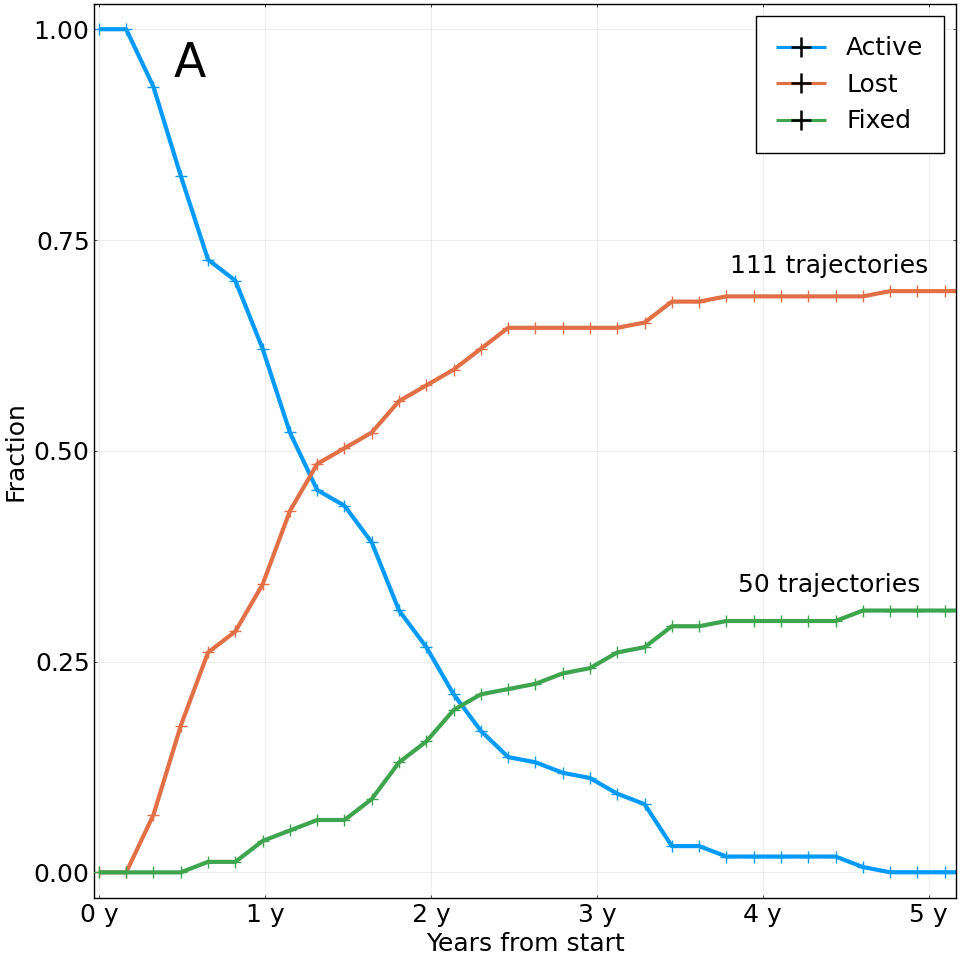

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: You passed a edgecolor/edg

In [12]:
p = plot(at_h3n2[!, :days], at_h3n2[!, :fact] .+ 0.0001, 
    label="Active", line = (3), marker=(:+, 8))
plot!(at_h3n2[!, :days], at_h3n2[!, :flost], label="Lost", line = (3), marker=(:+, 8))
plot!(at_h3n2[!, :days], at_h3n2[!, :ffixed], label="Fixed", line = (3), marker=(:+, 8))

# Labels / ticks
plot!(xlim = (-10,5*365 + 60))
plot!(xticks=([i*365 for i in 0:5],["$i y" for i in 0:5]))
plot!(p,size=(1280, 480),frame=:box, title="", xlabel="Years from start", ylabel="Fraction")
plot!(p, tickfontsize=tfs, legendfontsize=lfs, guidefontsize=alfs,titlefontsize=alfs)

# Annotations
annotate!(p, 200, 0.96, text("A", annfs))
xann = 4.4*365
yann_fix = at_h3n2[end, :ffixed] + 0.03
yann_lost = at_h3n2[end, :flost] + 0.03
annotate!([(xann, yann_lost, text("$(at_h3n2[end, :nlost]) trajectories", lfs)), 
        (xann, yann_fix, text("$(at_h3n2[end, :nfixed]) trajectories", lfs))])

# 
p3_sb1 = p
plot!(p, size=(960, 960))

## H1N1

In [35]:
fp_h1n1_ha = Flu.FluPop(aln_h1n1pdm_ha_aa, :aa, Flu.flu_usual_header_fields , 
    flulineage="h1n1pdm", segment="ha", ignore_read_errors=true);
fp_h1n1_na = Flu.FluPop(aln_h1n1pdm_na_aa, :aa, Flu.flu_usual_header_fields , 
    flulineage="h1n1pdm", segment="na", ignore_read_errors=true);

Reading ../alignments/aligned_h1n1pdm_ha_aa.fasta...
Read 45350 strains out of 54146. Filtered 8796. Could not read 0
Reading ../alignments/aligned_h1n1pdm_na_aa.fasta...
Read 40412 strains out of 42854. Filtered 2442. Could not read 0


In [12]:
Flu.bin_by_date!(fp_h1n1_ha, start=startdate_act_h1n1, binwidth=binwidth_act, binspacing = binspacing_act);
Flu.bin_by_date!(fp_h1n1_na, start=startdate_act_h1n1, binwidth=binwidth_act, binspacing = binspacing_act);

println("Position history for h1n1 HA...")
ph_h1n1_ha = Flu.PosEvo(fp_h1n1_ha);
println("Position history for h1n1 NA...")
ph_h1n1_na = Flu.PosEvo(fp_h1n1_na);

Position history for h1n1 HA...
Position history for h1n1 NA...


In [13]:
# h1n1 HA trajectories
tr_h1n1_ha_at = Flu.all_trajectories(ph_h1n1_ha, keep_unfinished=false);
tr_h1n1_ha_at = Flu.previous_state_condition(tr_h1n1_ha_at, :lost);
tr_h1n1_ha_at = Flu.population_size_condition(tr_h1n1_ha_at, 10);
tr_h1n1_ha_at = Flu.min_frequency_condition(tr_h1n1_ha_at, 0.2);

In [14]:
# h1n1 na trajectories
tr_h1n1_na_at = Flu.all_trajectories(ph_h1n1_na, keep_unfinished=false);
tr_h1n1_na_at = Flu.previous_state_condition(tr_h1n1_na_at, :lost);
tr_h1n1_na_at = Flu.population_size_condition(tr_h1n1_na_at, 10);
tr_h1n1_na_at = Flu.min_frequency_condition(tr_h1n1_na_at, 0.2);

In [15]:
# compute_activity_table returns a DataFrame summarizing activity statistics
at_h1n1 = Flu.compute_activity_table(vcat(tr_h1n1_ha_at, tr_h1n1_na_at), binspacing_act.value, 10*365);

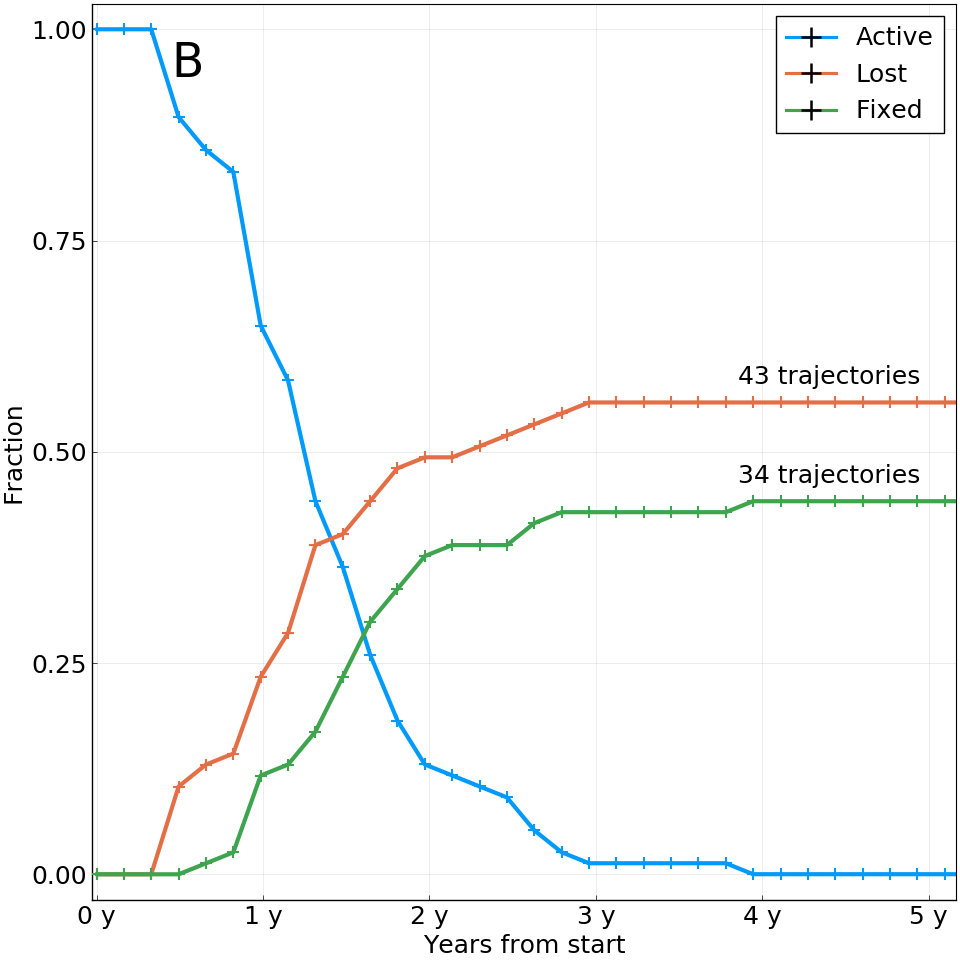

In [16]:
p = plot(at_h1n1[!, :days], at_h1n1[!, :fact] .+ 0.0001, 
    label="Active", line = (3), marker=(:+, 8))
plot!(at_h1n1[!, :days], at_h1n1[!, :flost], label="Lost", line = (3), marker=(:+, 8))
plot!(at_h1n1[!, :days], at_h1n1[!, :ffixed], label="Fixed", line = (3), marker=(:+, 8))

# Labels / ticks
plot!(xlim = (-10,5*365 + 60))
plot!(xticks=([i*365 for i in 0:5],["$i y" for i in 0:5]))
plot!(p,size=(1280, 480),frame=:box, title="", xlabel="Years from start", ylabel="Fraction")
plot!(p, tickfontsize=tfs, legendfontsize=lfs, guidefontsize=alfs,titlefontsize=alfs)

# Annotations
annotate!(p, 200, 0.96, text("B", annfs))
xann = 4.4*365
yann_fix = at_h1n1[end, :ffixed] + 0.03
yann_lost = at_h1n1[end, :flost] + 0.03
annotate!([(xann, yann_lost, text("$(at_h1n1[end, :nlost]) trajectories", lfs)), 
        (xann, yann_fix, text("$(at_h1n1[end, :nfixed]) trajectories", lfs))])

# 
p3_sb3 = p
plot!(p, size=(960, 960))

# Probability of fixation vs frequency

In [17]:
# Binning in frequency space
alphabins_ = 0.125:0.15:0.875
alphabins = [(a, 0.075) for a in alphabins_];

In [18]:
# Time bins and startdate 
binwidth = Day(30);
binspacing = Day(30);
startdate_h3n2 = Date(2000);
startdate_h1n1 = Date(2009,05)

2009-05-01

## H3N2

In [19]:
# Amino acids - HA
Flu.bin_by_date!(fp_h3n2_ha, start=startdate_h3n2, binwidth=binwidth, binspacing = binspacing);
ph_h3n2_ha = Flu.PosEvo(fp_h3n2_ha);

In [20]:
# Nucleotides (synonymous mutations) - HA
fp_h3n2_ha_nt = Flu.FluPop(aln_h3n2_ha_nt, :dna, Flu.flu_usual_header_fields , 
    flulineage="h3n2", segment="ha", ignore_read_errors=true)
Flu.bin_by_date!(fp_h3n2_ha_nt, start=startdate_h3n2, binwidth=binwidth, binspacing=binspacing)
#
monomorphic_positions_h3n2_ha = vec(readdlm("../data/h3n2/monomorphic_positions_ha.txt", Int64));
mpos_h3n2_ha = vcat([(i-1)*3 .+ [1,2,3] for i in monomorphic_positions_h3n2_ha]...)
println("Computing position history, may take some time..."); flush(stdout)
ph_h3n2_ha_nt = [Flu.PosEvo(fp_h3n2_ha_nt, i) for i in mpos_h3n2_ha];

Reading ../alignments/aligned_h3n2_ha.fasta...
Read 44970 strains out of 61848. Filtered 16878. Could not read 0
Computing position history, may take some time...


In [21]:
# Amino acids - NA
Flu.bin_by_date!(fp_h3n2_na, start=startdate_h3n2, binwidth=binwidth, binspacing = binspacing);
ph_h3n2_na = Flu.PosEvo(fp_h3n2_na);

In [22]:
# Nucleotides (synonymous mutations) - NA
fp_h3n2_na_nt = Flu.FluPop(aln_h3n2_na_nt, :dna, Flu.flu_usual_header_fields , 
    flulineage="h3n2", segment="na", ignore_read_errors=true)
Flu.bin_by_date!(fp_h3n2_na_nt, start=startdate_h3n2, binwidth=binwidth, binspacing=binspacing)
#
monomorphic_positions_h3n2_na = vec(readdlm("../data/h3n2/monomorphic_positions_na.txt", Int64));
mpos_h3n2_na = vcat([(i-1)*3 .+ [1,2,3] for i in monomorphic_positions_h3n2_na]...)
println("Computing position history, may take some time..."); flush(stdout)
ph_h3n2_na_nt = [Flu.PosEvo(fp_h3n2_na_nt, i) for i in mpos_h3n2_na];

Reading ../alignments/aligned_h3n2_na.fasta...
Read 35978 strains out of 39312. Filtered 3334. Could not read 0
Computing position history, may take some time...


In [37]:
xna, yna, errna = pfix_v_freq(ph_h3n2_na, alphabins);
println("For h3n2 HA:")
xha, yha, errha = pfix_v_freq(ph_h3n2_ha, alphabins, v=true);
# 
xha_s, yha_s, errha_s = pfix_v_freq(ph_h3n2_ha_nt, alphabins);
xna_s, yna_s, errna_s = pfix_v_freq(ph_h3n2_na_nt, alphabins);

For h3n2 HA:
Based on a total of 800 trajectories


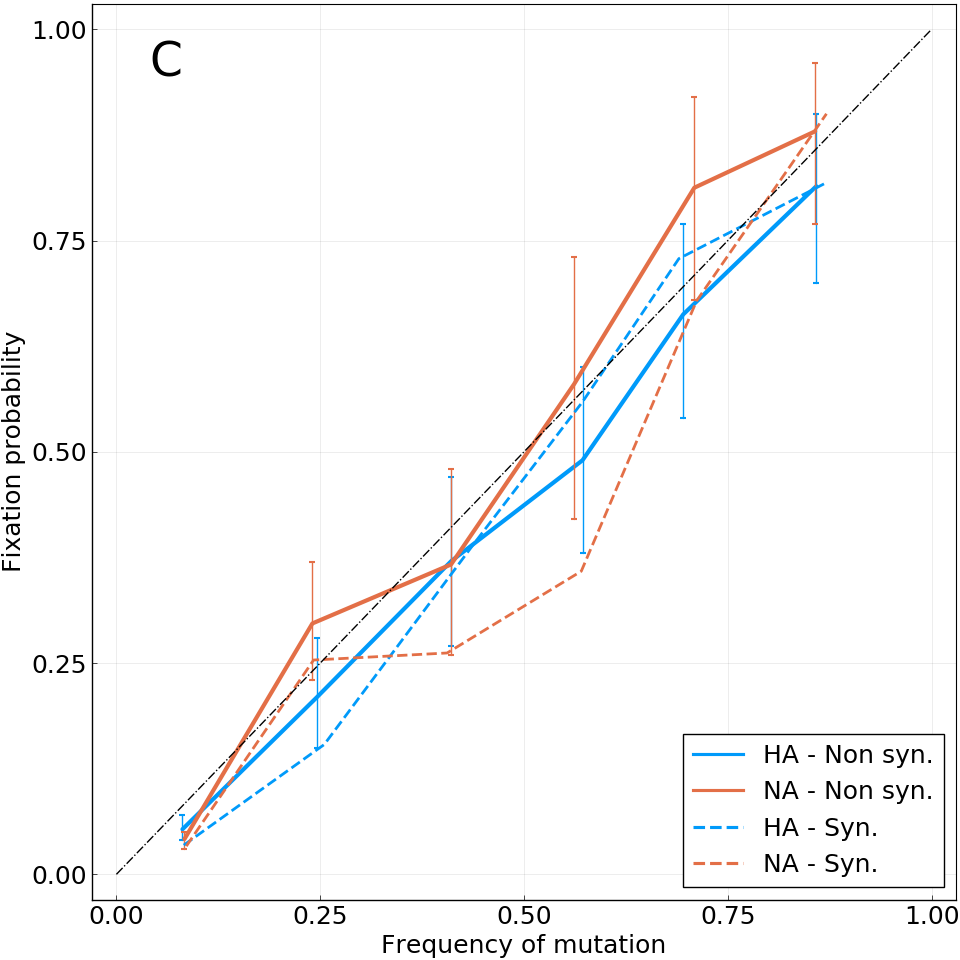

In [24]:
p = plot(size = (1280,960))
plot!(p, xha, yha, yerr=errha, label="HA - Non syn.", line=(3))
plot!(p, xna, yna, yerr=errna, label="NA - Non syn.", line=(3))
plot!(p, xha_s, yha_s, label="HA - Syn.", line=(2, :dash), color=1)
plot!(p, xna_s, yna_s, label="NA - Syn.", line=(2, :dash), color=2)
plot!(p, [0,1],[0,1], label="", line=(1,:black,:dashdot))

plot!(xlabel="Frequency of mutation", ylabel="Fixation probability", legend=:bottomright)
plot!(p, legendfontsize=lfs, titlefontsize=tfs, guidefontsize=alfs, tickfontsize=atfs, frame=:box)

p3_sb2 = plot(p, size=(960,960))
annotate!(p3_sb2, 0.06, 0.96, text("C", annfs))

## H1N1

In [25]:
# Amino acids - HA
Flu.bin_by_date!(fp_h1n1_ha, start=startdate_h1n1, binwidth=binwidth, binspacing = binspacing);
ph_h1n1_ha = Flu.PosEvo(fp_h1n1_ha);

In [26]:
# Nucleotides (synonymous mutations) - HA
fp_h1n1_ha_nt = Flu.FluPop(aln_h1n1pdm_ha_nt, :dna, Flu.flu_usual_header_fields , 
    flulineage="h1n1pdm", segment="ha", ignore_read_errors=true)
Flu.bin_by_date!(fp_h1n1_ha_nt, start=startdate_h1n1, binwidth=binwidth, binspacing=binspacing)
#
monomorphic_positions_h1n1_ha = vec(readdlm("../data/h1n1pdm/monomorphic_positions_ha.txt", Int64));
mpos_h1n1_ha = vcat([(i-1)*3 .+ [1,2,3] for i in monomorphic_positions_h1n1_ha]...)
println("Computing position history, may take some time..."); flush(stdout)
ph_h1n1_ha_nt = [Flu.PosEvo(fp_h1n1_ha_nt, i) for i in mpos_h1n1_ha];

Reading ../alignments/aligned_h1n1pdm_ha.fasta...
Read 45263 strains out of 54146. Filtered 8802. Could not read 81
Computing position history, may take some time...


In [27]:
# Amino acids - NA
Flu.bin_by_date!(fp_h1n1_na, start=startdate_h1n1, binwidth=binwidth, binspacing = binspacing);
ph_h1n1_na = Flu.PosEvo(fp_h1n1_na);

In [28]:
# Nucleotides (synonymous mutations) - NA
fp_h1n1_na_nt = Flu.FluPop(aln_h1n1pdm_na_nt, :dna, Flu.flu_usual_header_fields , 
    flulineage="h1n1pdm", segment="na", ignore_read_errors=true)
Flu.bin_by_date!(fp_h1n1_na_nt, start=startdate_h1n1, binwidth=binwidth, binspacing=binspacing)
#
monomorphic_positions_h1n1_na = vec(readdlm("../data/h1n1pdm/monomorphic_positions_na.txt", Int64));
mpos_h1n1_na = vcat([(i-1)*3 .+ [1,2,3] for i in monomorphic_positions_h1n1_na]...)
println("Computing position history, may take some time..."); flush(stdout)
ph_h1n1_na_nt = [Flu.PosEvo(fp_h1n1_na_nt, i) for i in mpos_h1n1_na];

Reading ../alignments/aligned_h1n1pdm_na.fasta...
Read 40375 strains out of 42854. Filtered 2442. Could not read 37
Computing position history, may take some time...


In [38]:
xna, yna, errna = pfix_v_freq(ph_h1n1_na, alphabins);
println("For h1n1 HA: ")
xha, yha, errha = pfix_v_freq(ph_h1n1_ha, alphabins, v=true);
# 
xha_s, yha_s, errha_s = pfix_v_freq(ph_h1n1_ha_nt, alphabins);
xna_s, yna_s, errna_s = pfix_v_freq(ph_h1n1_na_nt, alphabins);

For h1n1 HA: 
Based on a total of 466 trajectories


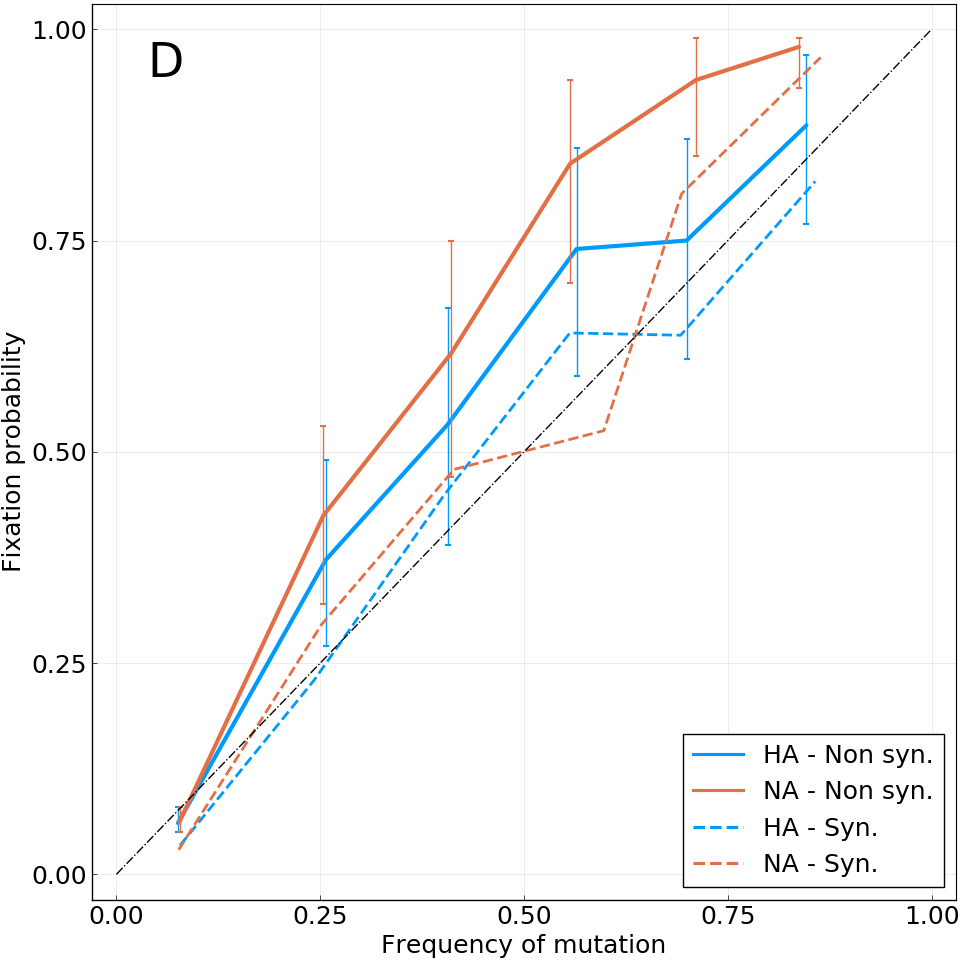

In [30]:
p = plot(size = (1280,960))
plot!(p, xha, yha, yerr=errha, label="HA - Non syn.", line=(3))
plot!(p, xna, yna, yerr=errna, label="NA - Non syn.", line=(3))
plot!(p, xha_s, yha_s, label="HA - Syn.", line=(2, :dash), color=1)
plot!(p, xna_s, yna_s, label="NA - Syn.", line=(2, :dash), color=2)
plot!(p, [0,1],[0,1], label="", line=(1,:black,:dashdot))

plot!(xlabel="Frequency of mutation", ylabel="Fixation probability", legend=:bottomright)
plot!(p, legendfontsize=lfs, titlefontsize=tfs, guidefontsize=alfs, tickfontsize=atfs, frame=:box)

p3_sb4 = plot(p, size=(960,960))
annotate!(p3_sb4, 0.06, 0.96, text("D", annfs))

# Full panel

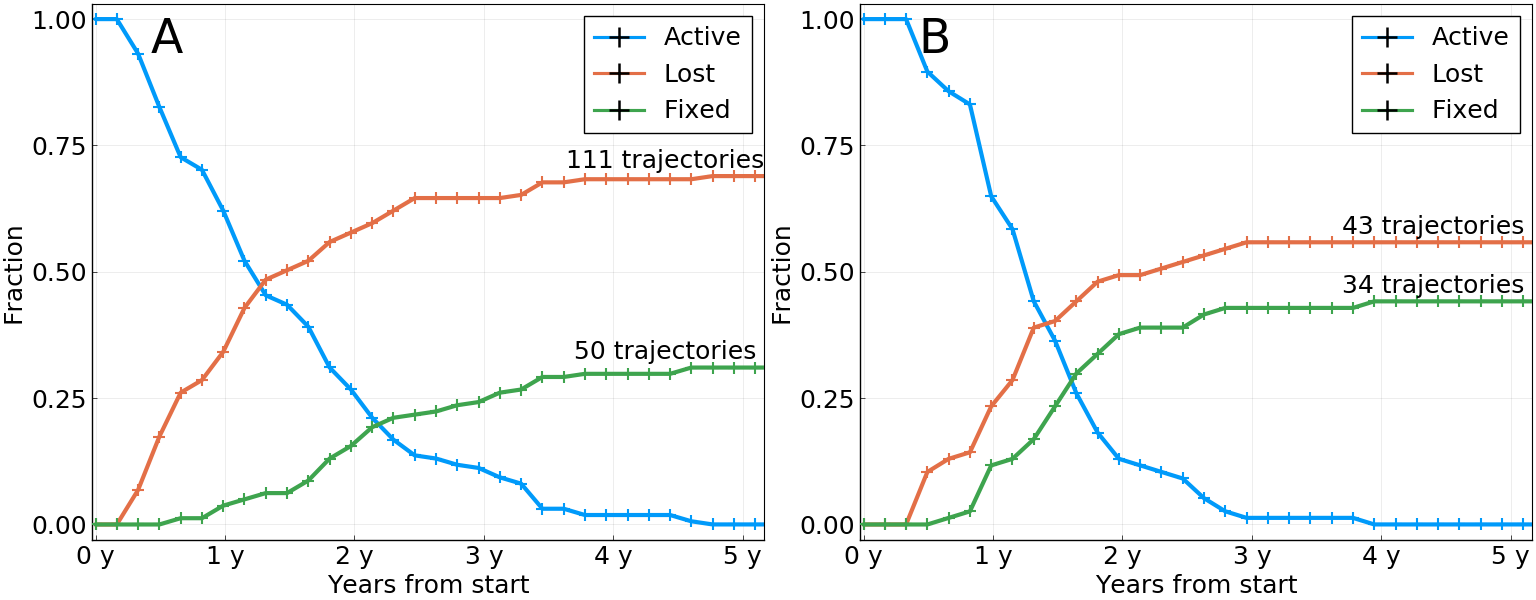

In [32]:
p3_p1 = plot(p3_sb1, p3_sb3, layout=grid(1,2), size = (1280*1.2, 500*1.2))

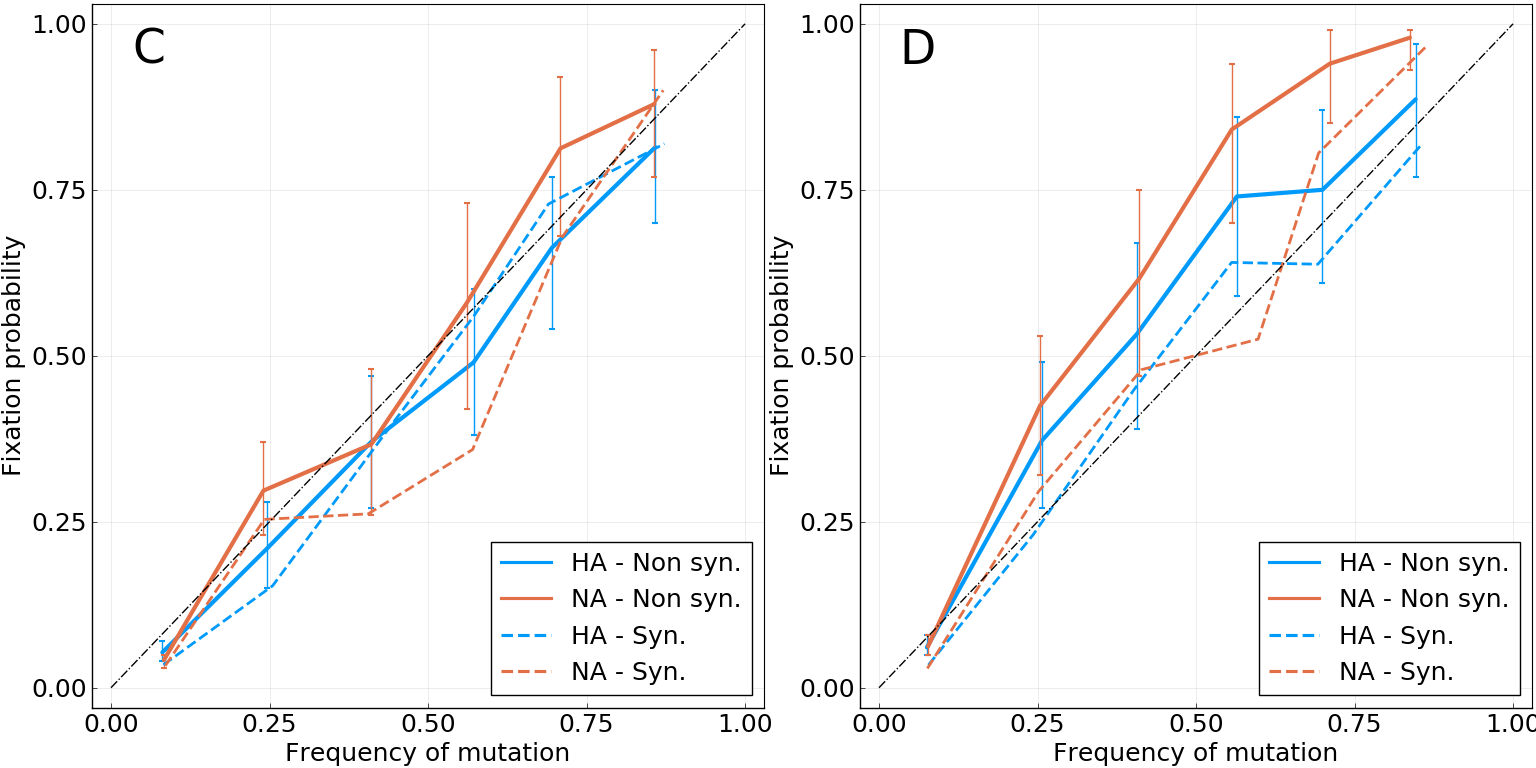

In [33]:
p3_p2 = plot(p3_sb2, p3_sb4, layout=grid(1,2), size = (1280*1.2, 640*1.2))

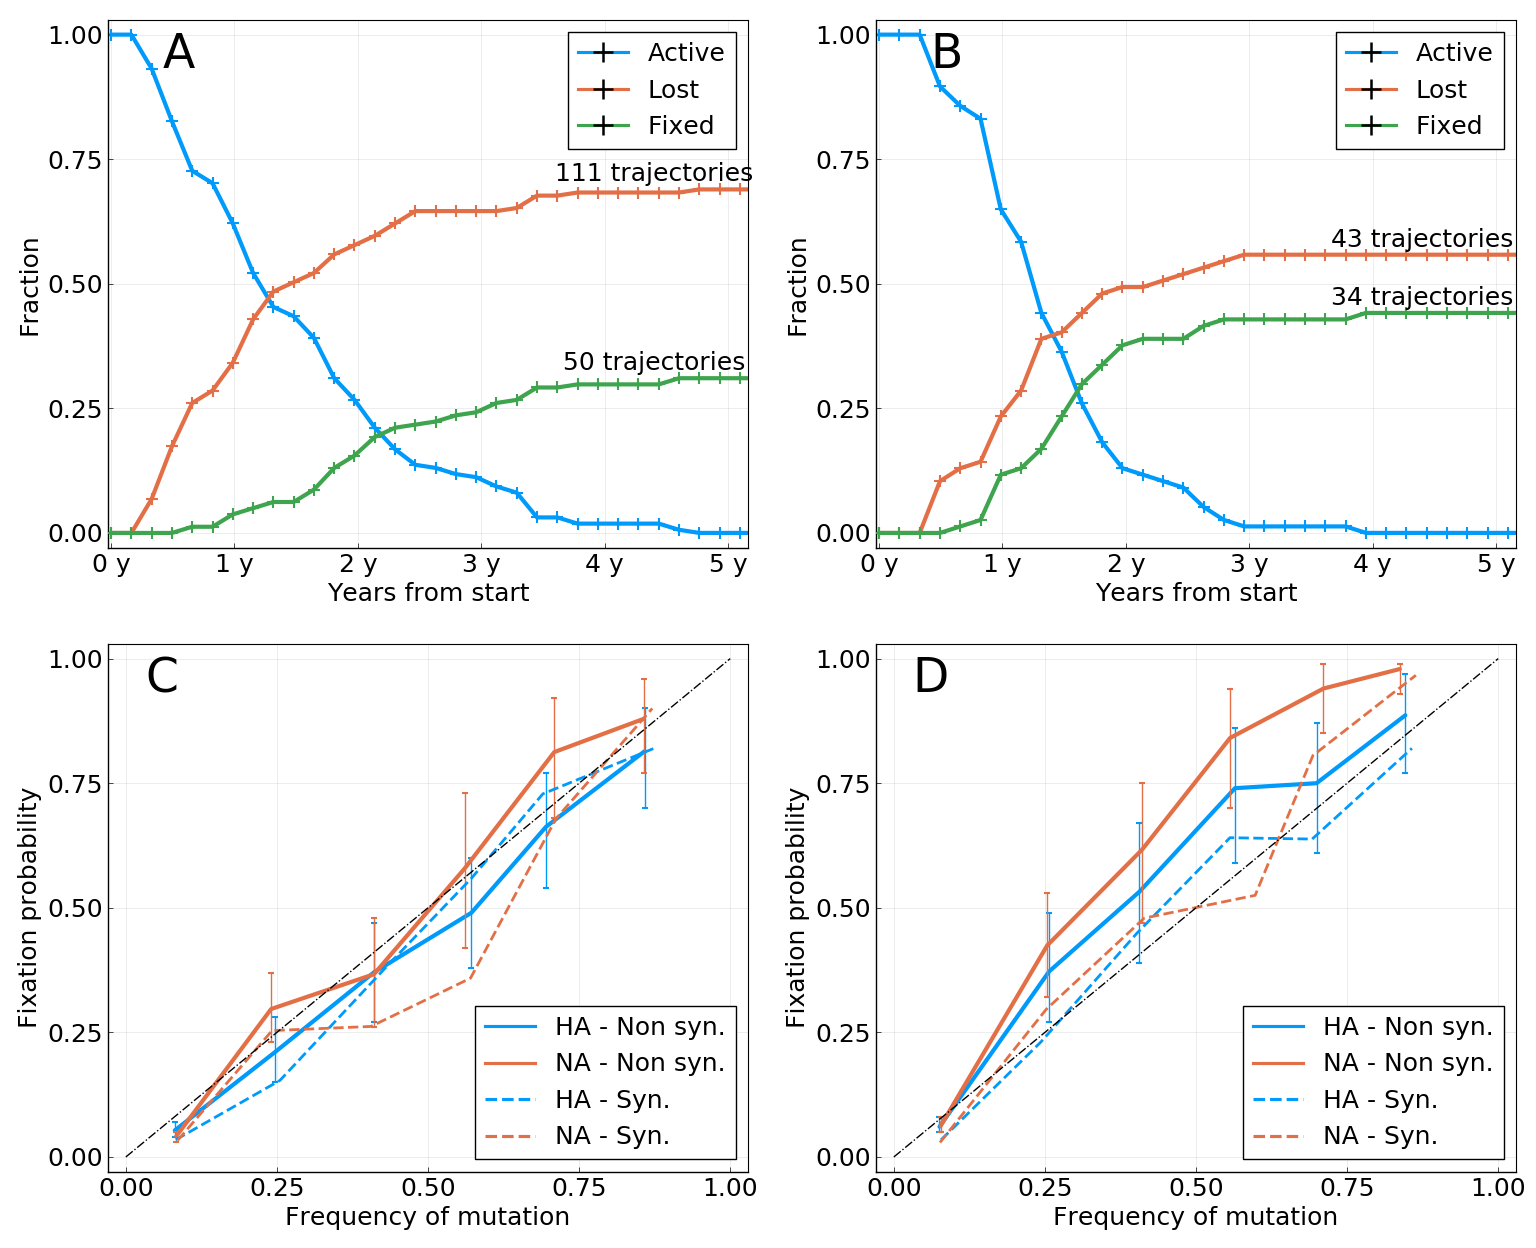

In [34]:
plot(p3_p1, p3_p2, layout=grid(2,1), size=(1280*1.2, 1040*1.2), margin=5mm)